In [48]:
#### Spectral clustering ####
# Input: array of shape(n, m), where n is the number of data points.

# Step:
# 1. Fully connected similarity matrix based on Gaussian Kernel
# 2. Laplacian matrix
# 3. Matrix of eigenvectors
# 4. K-means.


In [2]:
import pandas as pd
import numpy as np
import math
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.sparse.linalg.eigen.arpack import eigsh 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
# Step 0
df = pd.read_csv('/Users/tjmask/Desktop/Semester 2/Data Mining/HW1/hw1/Homework_1/Datasets/eye.csv')
data = np.array(df)
data = data[:,1:]

In [14]:
# Step 1
def get_simi_matrix(data, sigma_2=1):
    assert sigma_2 > 1e-3, "Please input a valid positive sigma"
    dm = np.power(pdist(data, 'euclidean'),2)
    def map_f(x):
        return math.exp(-x/sigma_2)
    return squareform(list(map(map_f,dm))) + np.eye(data.shape[0]) 

In [16]:
simi_matrix = get_simi_matrix(data, sigma_2 = 0.05)
simi_matrix

array([[1.00000000e+00, 2.58624571e-01, 4.54633497e-03, ...,
        8.23041599e-23, 7.86340226e-24, 1.05347031e-25],
       [2.58624571e-01, 1.00000000e+00, 2.57515524e-01, ...,
        7.81975752e-22, 2.63558676e-22, 2.19499694e-25],
       [4.54633497e-03, 2.57515524e-01, 1.00000000e+00, ...,
        5.53748006e-23, 6.46706972e-23, 2.88362672e-27],
       ...,
       [8.23041599e-23, 7.81975752e-22, 5.53748006e-23, ...,
        1.00000000e+00, 7.44896587e-01, 4.72245332e-01],
       [7.86340226e-24, 2.63558676e-22, 6.46706972e-23, ...,
        7.44896587e-01, 1.00000000e+00, 1.78824422e-01],
       [1.05347031e-25, 2.19499694e-25, 2.88362672e-27, ...,
        4.72245332e-01, 1.78824422e-01, 1.00000000e+00]])

In [17]:
# Step 2
D = sum(simi_matrix) # vector 
D = np.power(D,-1/2) # D^{-1/2}
L = np.eye(len(D))-np.dot(np.dot(np.diag(D),simi_matrix),np.diag(D)) # Laplician matrix

In [18]:
# Step 3
num_clusters = 2 # Input number of clusters
_, eigenv = eigsh(L, num_clusters, which='SM') # num_clusters smallest eigenvectors

In [19]:
# Step 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(eigenv)
labels = kmeans.labels_ 

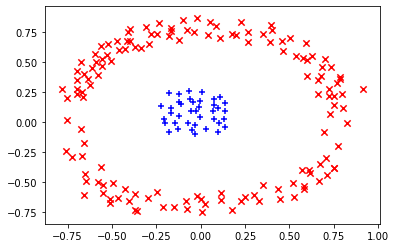

In [20]:
# Visualization
plt.scatter(data[labels==0,0],data[labels==0,1], marker = 'x',color = 'red', s = 40 ,label = 'First')
plt.scatter(data[labels==1,0],data[labels==1,1], marker = '+', color = 'blue', s = 40, label = 'Second')